In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("Mental Health Dataset.csv")

In [6]:
data.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [8]:
data.shape

(10392, 3)

In this data set we have 10392 rows and 3 columns

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10392 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10392 non-null  object
 2   intensity  10392 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 243.7+ KB


Here we have two object columns and one numercal column.
      object    -----> posts,predicted
      numerical -----> intensity

In [16]:
#check data set have null values
data.isnull().sum()

posts        1
predicted    0
intensity    0
dtype: int64

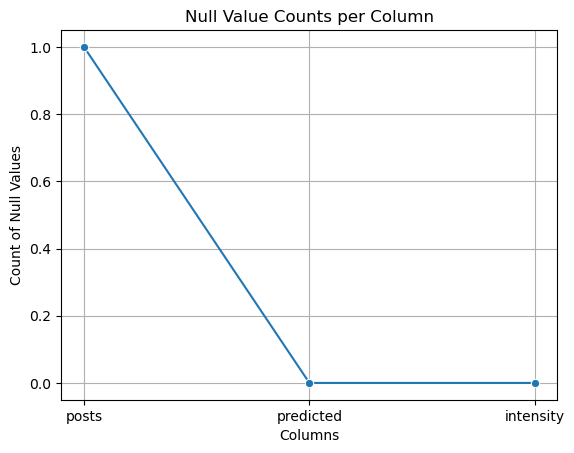

In [18]:
#plot null values

# Step 1: Calculate the count of null values for each column
null_counts = data.isnull().sum()

# Step 2: Create a DataFrame with these counts
null_counts_df = null_counts.reset_index()
null_counts_df.columns = ['Column', 'Null_Count']

# Step 3: Use seaborn to create a line plot
sns.lineplot(data=null_counts_df, x='Column', y='Null_Count', marker='o')

# Optional: Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.title('Null Value Counts per Column')
plt.grid(True)

# Show the plot
plt.show()

In [19]:
# Find rows with null values
rows_with_nulls = data[data.isnull().any(axis=1)]
rows_with_nulls

,posts,predicted,intensity
3979,NaN,neutral,0


In [20]:
#remove null value row
data = data.drop(3979)

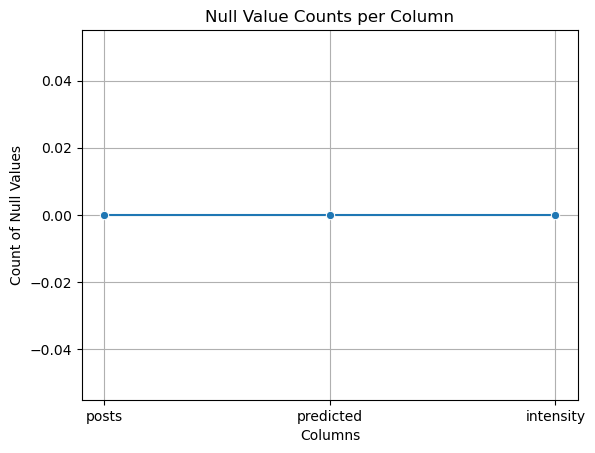

In [24]:
#after the remove null values

# Step 1: Calculate the count of null values for each column
null_counts = data.isnull().sum()

# Step 2: Create a DataFrame with these counts
null_counts_df = null_counts.reset_index()
null_counts_df.columns = ['Column', 'Null_Count']

# Step 3: Use seaborn to create a line plot
sns.lineplot(data=null_counts_df, x='Column', y='Null_Count', marker='o')

# Optional: Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.title('Null Value Counts per Column')
plt.grid(True)

# Show the plot
plt.show()

In [25]:
#data shape
data.shape

(10391, 3)

In [26]:
#Find dupicate
data.duplicated().sum()

0

In this data set we have not duplicate values

Text Preprocessing

In [32]:
#import necessaray libraries
import re
import string

In [34]:
#convert upper case into lower case
data['posts'] = data['posts'].str.lower()

In [36]:
data['posts'].head(200)

0      i know as parent of child with down syndrome t...
1      but in my heart i know this is the future prom...
2      i have mylefibrosis which turn to leukemia the...
3      from one of my health group subject wayne dyer...
4      gmos now link to leukemia http nsnbc i 2013 07...
                             ...                        
195    hello my name is holly and i want to share my ...
196    i go into a favorite store of mine today and w...
197    fry laboratory l l c must have follow the 141 ...
198    i just think i would share my short experience...
199    i am at 9 1 2 month since lose my husband larr...
Name: posts, Length: 200, dtype: object

In [38]:
#remove links
# Define a regular expression pattern for URLs
url_pattern = r'http\S+|www.\S+'

# Remove URLs using a lambda function
data['posts'] = data['posts'].apply(lambda x: re.sub(url_pattern, '', x))


In [40]:
data['posts'].head(200)

0      i know as parent of child with down syndrome t...
1      but in my heart i know this is the future prom...
2      i have mylefibrosis which turn to leukemia the...
3      from one of my health group subject wayne dyer...
4      gmos now link to leukemia http nsnbc i 2013 07...
                             ...                        
195    hello my name is holly and i want to share my ...
196    i go into a favorite store of mine today and w...
197    fry laboratory l l c must have follow the 141 ...
198    i just think i would share my short experience...
199    i am at 9 1 2 month since lose my husband larr...
Name: posts, Length: 200, dtype: object

In [42]:
#remove punctuations
# Function to remove punctuations
def remove_punctuation(text):
    # Define punctuation characters
    translator = str.maketrans('', '', string.punctuation)
    # Remove punctuations
    text = text.translate(translator)
    return text

# Apply the function using a lambda function
data['posts'] = data['posts'].apply(lambda x: remove_punctuation(x))

In [44]:
data['posts'].head()

0    i know as parent of child with down syndrome t...
1    but in my heart i know this is the future prom...
2    i have mylefibrosis which turn to leukemia the...
3    from one of my health group subject wayne dyer...
4    gmos now link to leukemia http nsnbc i 2013 07...
Name: posts, dtype: object

In [46]:
#remove numbers in data set 
# Function to remove numbers using regex
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)  # \d+ matches one or more digits
    text = re.sub(r'\s+', ' ', text.strip())
    return text

# Apply the function using a lambda function
data['posts'] = data['posts'].apply(lambda x: remove_numbers(x))

In [47]:
data['posts'].head(200)

0      i know as parent of child with down syndrome t...
1      but in my heart i know this is the future prom...
2      i have mylefibrosis which turn to leukemia the...
3      from one of my health group subject wayne dyer...
4      gmos now link to leukemia http nsnbc i gmo now...
                             ...                        
195    hello my name is holly and i want to share my ...
196    i go into a favorite store of mine today and w...
197    fry laboratory l l c must have follow the inte...
198    i just think i would share my short experience...
199    i am at month since lose my husband larry to l...
Name: posts, Length: 200, dtype: object

In [48]:
#remove stop words
!pip install nltk

In [49]:
import nltk

In [50]:
#download all languages stop words
nltk.download('stopwords',download_dir = './stop words')

[nltk_data] Downloading package stopwords to ./stop words...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
#Open only English language stop words 
with open('./stop words/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [54]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
#Function to remove stopwords
def remove_stopwords(text):
    tokens = text.split()  # Split text into tokens
    filtered_tokens = [word for word in tokens if word.lower() not in sw]  # Remove stopwords
    return ' '.join(filtered_tokens)  # Join tokens back into a string

# Apply the function using a lambda function
data['posts'] = data['posts'].apply(lambda x: remove_stopwords(x))

In [56]:
data['posts'].head(200)

0      know parent child syndrome hear child high ris...
1      heart know future promise article regardless h...
2      mylefibrosis turn leukemia want stem cell tran...
3      one health group subject wayne dyer leukemia c...
4      gmos link leukemia http nsnbc gmo link leukemi...
                             ...                        
195    hello name holly want share father story janua...
196    go favorite store mine today talk lady ring pu...
197    fry laboratory l l c must follow international...
198    think would share short experience find cml ma...
199    month since lose husband larry leukemia spend ...
Name: posts, Length: 200, dtype: object

In [57]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [58]:
data['posts'] = data['posts'].apply(lambda x:" " .join(ps.stem(x) for x in x.split()))

In [59]:
data['posts'].head(200)

0      know parent child syndrom hear child high risk...
1      heart know futur promis articl regardless http...
2      mylefibrosi turn leukemia want stem cell trans...
3      one health group subject wayn dyer leukemia ca...
4      gmo link leukemia http nsnbc gmo link leukemia...
                             ...                        
195    hello name holli want share father stori janua...
196    go favorit store mine today talk ladi ring pur...
197    fri laboratori l l c must follow intern intele...
198    think would share short experi find cml mayb l...
199    month sinc lose husband larri leukemia spend m...
Name: posts, Length: 200, dtype: object

Building Vacabulary

In [61]:
from collections import Counter
vocab = Counter()

In [62]:
#find count of unique words in data set
for post in data['posts']:
    vocab.update(post.split())

In [63]:
#look count list
vocab

Counter({'cancer': 16634,
         'go': 11408,
         'get': 10158,
         'liver': 10019,
         'year': 8829,
         'know': 8531,
         'say': 7861,
         'would': 7318,
         'time': 6919,
         'like': 6480,
         'feel': 6346,
         'day': 6091,
         'one': 6020,
         'take': 6006,
         'lung': 5935,
         'think': 5369,
         'find': 5313,
         'week': 5260,
         'tell': 5223,
         'pain': 5096,
         'doctor': 5027,
         'month': 4924,
         'also': 4786,
         'well': 4733,
         'see': 4712,
         'help': 4661,
         'blood': 4627,
         'want': 4581,
         'back': 4366,
         'could': 4311,
         'make': 4033,
         'good': 3989,
         'treatment': 3786,
         'come': 3785,
         'last': 3767,
         'test': 3667,
         'diseas': 3610,
         'need': 3465,
         'start': 3463,
         'life': 3448,
         'anyon': 3415,
         'much': 3331,
         'thank': 

In [64]:
#Totall number of words
len(vocab)

30444

In this data set posts columns have 30444 number of words,Then model create 30444 number of features.

In [66]:
data.shape

(10391, 3)

In here we have 30444 features and 10391 data rows,features > data rows there for model overfitting.

In [68]:
tokens = [key for key in vocab if vocab[key] > 100]

In [69]:
len(tokens)

1595

In here we reduce our features,then we can solve overfitting situation

In [71]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, './vocabulary.txt')

Divde data into train and test

In [73]:
#split data set x and y
x = data['posts']
y = data['intensity']

In [74]:
#split data set train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [75]:
print('x_train ---> ',x_train.shape)
print('x_test  ---> ',x_test.shape)
print('y_train ---> ',y_train.shape)
print('y_test  ---> ',y_test.shape)

x_train --->  (8312,)
x_test  --->  (2079,)
y_train --->  (8312,)
y_test  --->  (2079,)


Here deta set divide into train and test data,Train data shape is  (8312,) and test data shape is  (2079,).

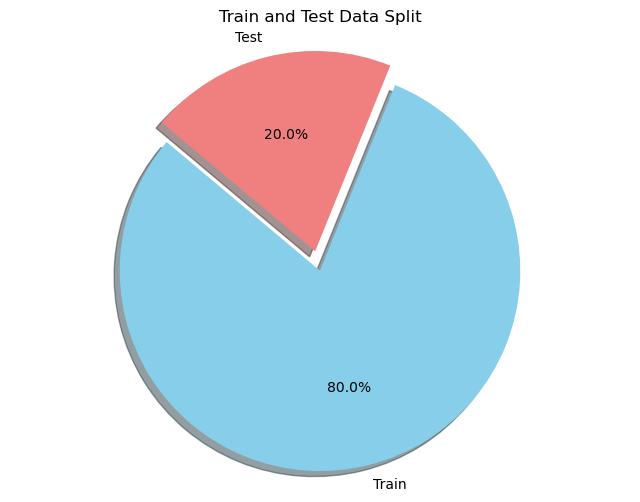

In [77]:
#plot pie graph for test and train

train_size = len(x_train)
test_size = len(x_test)
# Sizes for the pie chart
sizes = [train_size, test_size]
labels = ['Train', 'Test']
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Train)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Train and Test Data Split')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [78]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [79]:
vectorized_x_train = vectorizer(x_train, tokens)

In [80]:
vectorized_x_test = vectorizer(x_test, tokens)

In [81]:
vectorized_x_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [82]:
#checking data set balaced or imbalanced data set
y_train.value_counts()

intensity
 0    3499
-1    3289
-2     924
 1     600
Name: count, dtype: int64

C:\Users\KMN IT\AppData\Local\Temp\ipykernel_18504\1494397479.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values,palette=palette)


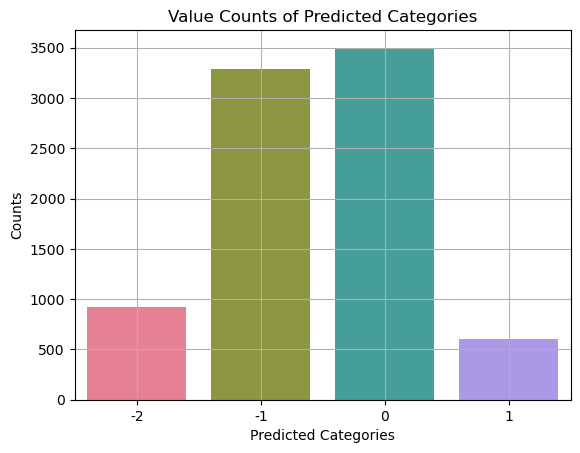

In [84]:
# Step 1: Calculate the value counts of the 'predicted' column
value_counts = y_train.value_counts()

# Step 2: Create a bar plot using seaborn
palette = sns.color_palette("husl", len(value_counts))
sns.barplot(x=value_counts.index, y=value_counts.values,palette=palette)

# Optional: Adding labels and title
plt.xlabel('Predicted Categories')
plt.ylabel('Counts')
plt.title('Value Counts of Predicted Categories')
plt.grid(True)

# Show the plot
plt.show()

Acording to tha plot this  data set look like imbalanced data set because netural and negative columns and very negative and positive columns differnce is very high.Therefore we convert in to balanced data set. 

Handle imbalanced data set

In [87]:
#Here we use SMOTE method to handle imbalanced data set
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(13996, 1595) (13996,)


In [88]:
#After the handle imbalanced data set y train value counts
y_train_smote.value_counts()

intensity
-1    3499
 0    3499
 1    3499
-2    3499
Name: count, dtype: int64

C:\Users\KMN IT\AppData\Local\Temp\ipykernel_18504\79628083.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values,palette=palette)


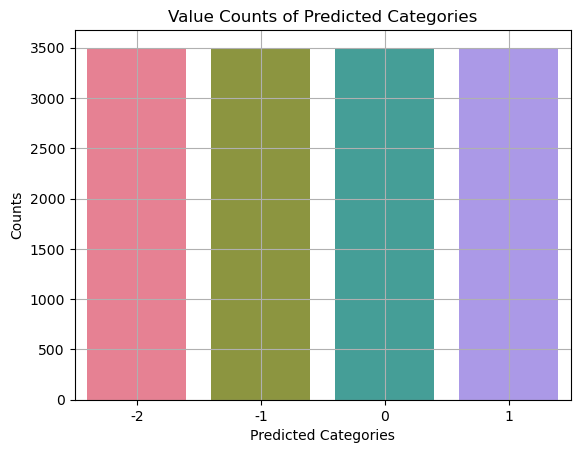

In [90]:
#After the balanced imbalanced data set

# Step 1: Calculate the value counts of the 'predicted' column
value_counts = y_train_smote.value_counts()

# Step 2: Create a bar plot using seaborn
palette = sns.color_palette("husl", len(value_counts))
sns.barplot(x=value_counts.index, y=value_counts.values,palette=palette)

# Optional: Adding labels and title
plt.xlabel('Predicted Categories')
plt.ylabel('Counts')
plt.title('Value Counts of Predicted Categories')
plt.grid(True)

# Show the plot
plt.show()

Model Building

In [92]:
#import necessary librarys
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [94]:
#define a function for calculate best model checking veriables

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, average='weighted'), 3)
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)
    mse = round(mean_squared_error(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}\n\tMSE = {mse}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, average='weighted'), 3)
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)
    mse = round(mean_squared_error(y_act, y_pred), 3)
    print(f'Validation Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}\n\tMSE = {mse}')


In [95]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred = lr.predict(vectorized_x_test)

print("Logistic Regression:")
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Logistic Regression:
Training Scores:
	Accuracy = 0.931
	Precision = 0.93
	Recall = 0.931
	F1-Score = 0.93
	MSE = 0.101
Validation Scores:
	Accuracy = 0.687
	Precision = 0.703
	Recall = 0.687
	F1-Score = 0.693
	MSE = 0.555


C:\Users\KMN IT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
#SVC
svc = SVC()
svc.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred_svc = svc.predict(vectorized_x_train_smote)
y_test_pred_svc = svc.predict(vectorized_x_test)

print("Support Vector Classifier:")
training_scores(y_train_smote, y_train_pred_svc)
validation_scores(y_test, y_test_pred_svc)


Support Vector Classifier:
Training Scores:
	Accuracy = 0.963
	Precision = 0.963
	Recall = 0.963
	F1-Score = 0.963
	MSE = 0.055
Validation Scores:
	Accuracy = 0.746
	Precision = 0.743
	Recall = 0.746
	F1-Score = 0.744
	MSE = 0.458


In [97]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred = dt.predict(vectorized_x_train_smote)
y_test_pred = dt.predict(vectorized_x_test)\

print("DecisionTreeClassifier:")
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

DecisionTreeClassifier:
Training Scores:
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
	MSE = 0.002
Validation Scores:
	Accuracy = 0.576
	Precision = 0.58
	Recall = 0.576
	F1-Score = 0.578
	MSE = 0.803


In [101]:
#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred_gnb = gnb.predict(vectorized_x_train_smote)
y_test_pred_gnb = gnb.predict(vectorized_x_test)

print("Gaussian Naive Bayes:")
training_scores(y_train_smote, y_train_pred_gnb)
validation_scores(y_test, y_test_pred_gnb)




Gaussian Naive Bayes:
Training Scores:
	Accuracy = 0.508
	Precision = 0.574
	Recall = 0.508
	F1-Score = 0.486
	MSE = 2.037
Validation Scores:
	Accuracy = 0.425
	Precision = 0.614
	Recall = 0.425
	F1-Score = 0.459
	MSE = 1.414


In [102]:
#K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred_knn = knn.predict(vectorized_x_train_smote)
y_test_pred_knn = knn.predict(vectorized_x_test)

print("K-Nearest Neighbors:")
training_scores(y_train_smote, y_train_pred_knn)
validation_scores(y_test, y_test_pred_knn)


K-Nearest Neighbors:
Training Scores:
	Accuracy = 0.662
	Precision = 0.736
	Recall = 0.662
	F1-Score = 0.62
	MSE = 0.69
Validation Scores:
	Accuracy = 0.298
	Precision = 0.626
	Recall = 0.298
	F1-Score = 0.311
	MSE = 1.69


In [103]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred_rfc = rfc.predict(vectorized_x_train_smote)
y_test_pred_rfc = rfc.predict(vectorized_x_test)

print("Random Forest Classifier:")
training_scores(y_train_smote, y_train_pred_rfc)
validation_scores(y_test, y_test_pred_rfc)


Random Forest Classifier:
Training Scores:
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
	MSE = 0.002
Validation Scores:
	Accuracy = 0.692
	Precision = 0.706
	Recall = 0.692
	F1-Score = 0.676
	MSE = 0.489


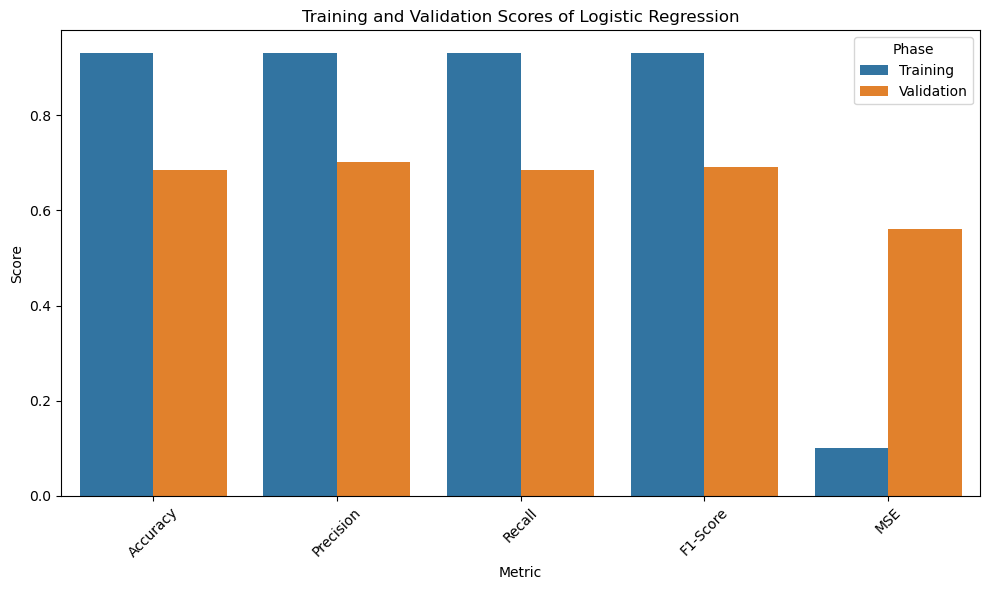

In [104]:
# Data for the Logistic Regression algorithms
algorithm = 'Logistic Regression'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'MSE']
train_scores = [0.932, 0.931, 0.932, 0.931, 0.1]
validation_scores = [0.685,0.702,0.685,0.691,0.562]

# Prepare the data for the plot
data = []
for j, metric in enumerate(metrics):
    data.append([metric, 'Training', train_scores[j]])
    data.append([metric, 'Validation', validation_scores[j]])

df = pd.DataFrame(data, columns=['Metric', 'Phase', 'Score'])

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Metric', y='Score', hue='Phase', errorbar=None)
plt.title(f'Training and Validation Scores of {algorithm}')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Phase')
plt.tight_layout()
plt.show()

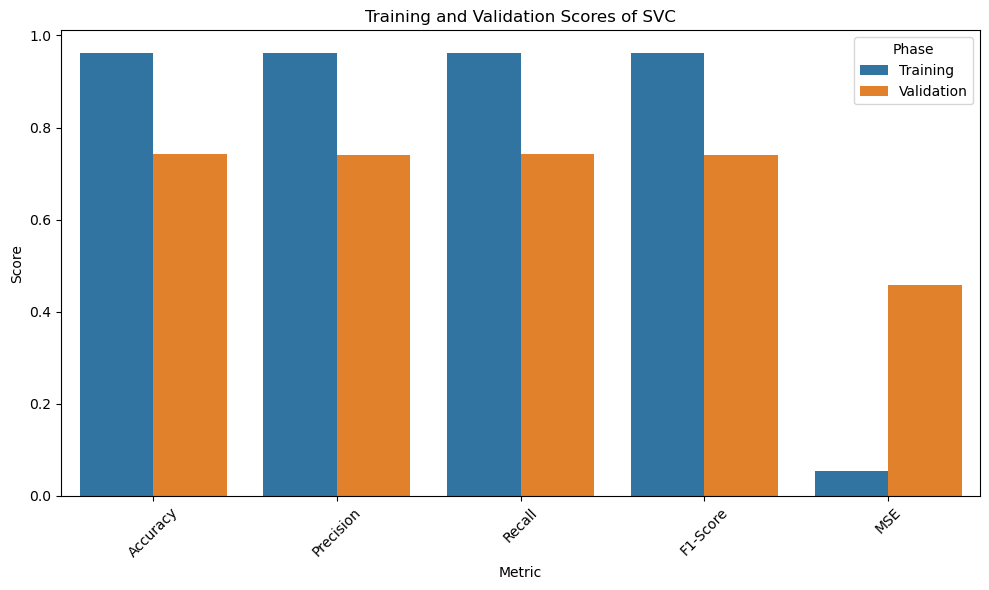

In [105]:
# Data for the SVC algorithms
algorithm = 'SVC'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'MSE']
train_scores = [0.963,0.963,0.963,0.963,0.054]
validation_scores = [0.742,0.74,0.742,0.741,0.459]

# Prepare the data for the plot
data = []
for j, metric in enumerate(metrics):
    data.append([metric, 'Training', train_scores[j]])
    data.append([metric, 'Validation', validation_scores[j]])

df = pd.DataFrame(data, columns=['Metric', 'Phase', 'Score'])

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Metric', y='Score', hue='Phase', errorbar=None)
plt.title(f'Training and Validation Scores of {algorithm}')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Phase')
plt.tight_layout()
plt.show()

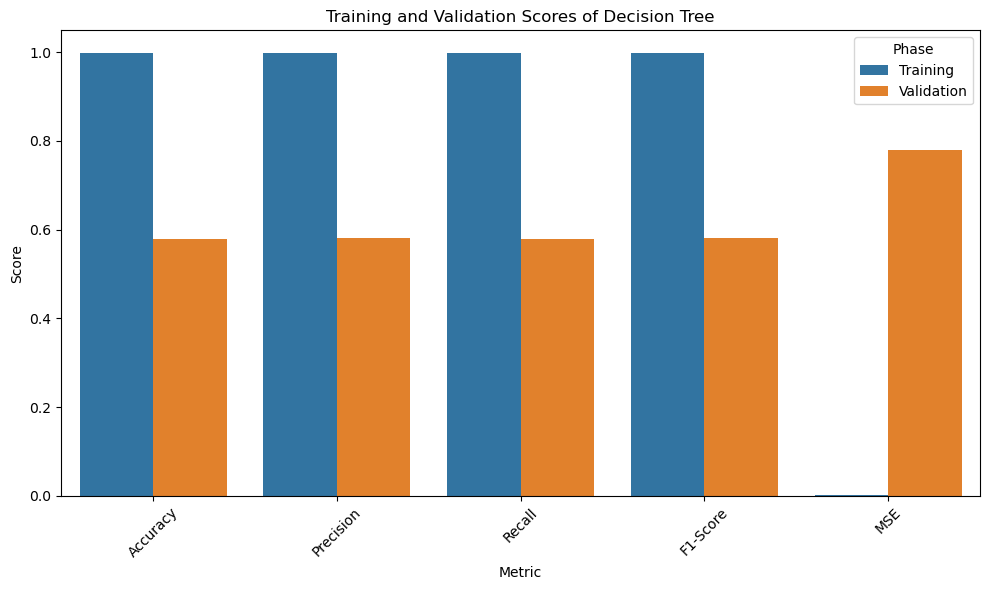

In [106]:
# Data for the SVC algorithms
algorithm = 'Decision Tree'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'MSE']
train_scores = [0.999, 0.999, 0.999, 0.999, 0.002]
validation_scores = [0.579, 0.581, 0.579, 0.58, 0.779]

# Prepare the data for the plot
data = []
for j, metric in enumerate(metrics):
    data.append([metric, 'Training', train_scores[j]])
    data.append([metric, 'Validation', validation_scores[j]])

df = pd.DataFrame(data, columns=['Metric', 'Phase', 'Score'])

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Metric', y='Score', hue='Phase', errorbar=None)
plt.title(f'Training and Validation Scores of {algorithm}')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Phase')
plt.tight_layout()
plt.show()

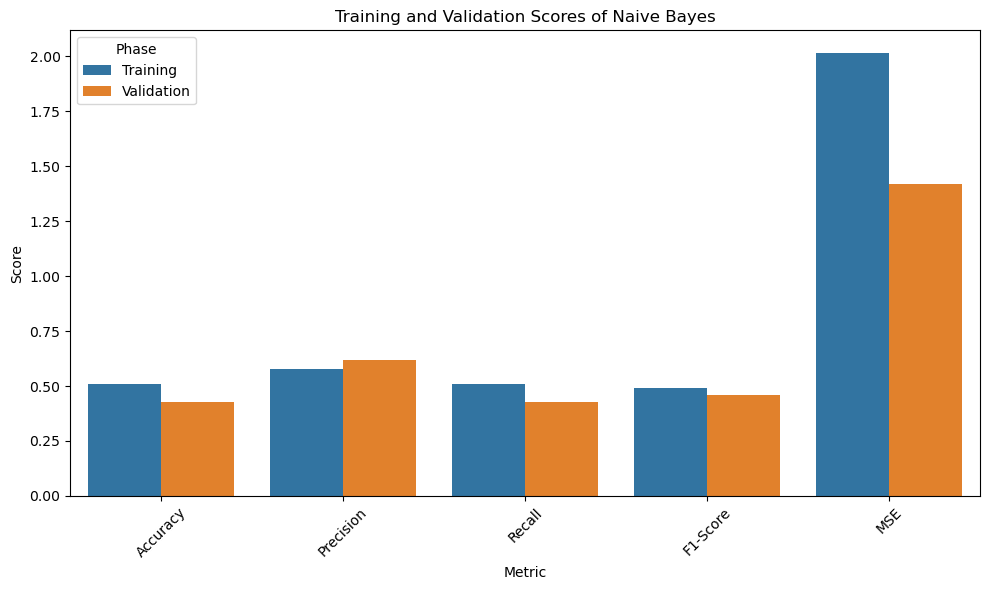

In [107]:
# Data for the Naive Bayes algorithms
algorithm = 'Naive Bayes'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'MSE']
train_scores = [ 0.51, 0.577,0.51,0.489,2.018]
validation_scores = [0.427,0.619,0.427,0.461,1.419]

# Prepare the data for the plot
data = []
for j, metric in enumerate(metrics):
    data.append([metric, 'Training', train_scores[j]])
    data.append([metric, 'Validation', validation_scores[j]])

df = pd.DataFrame(data, columns=['Metric', 'Phase', 'Score'])

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Metric', y='Score', hue='Phase', errorbar=None)
plt.title(f'Training and Validation Scores of {algorithm}')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Phase')
plt.tight_layout()
plt.show()



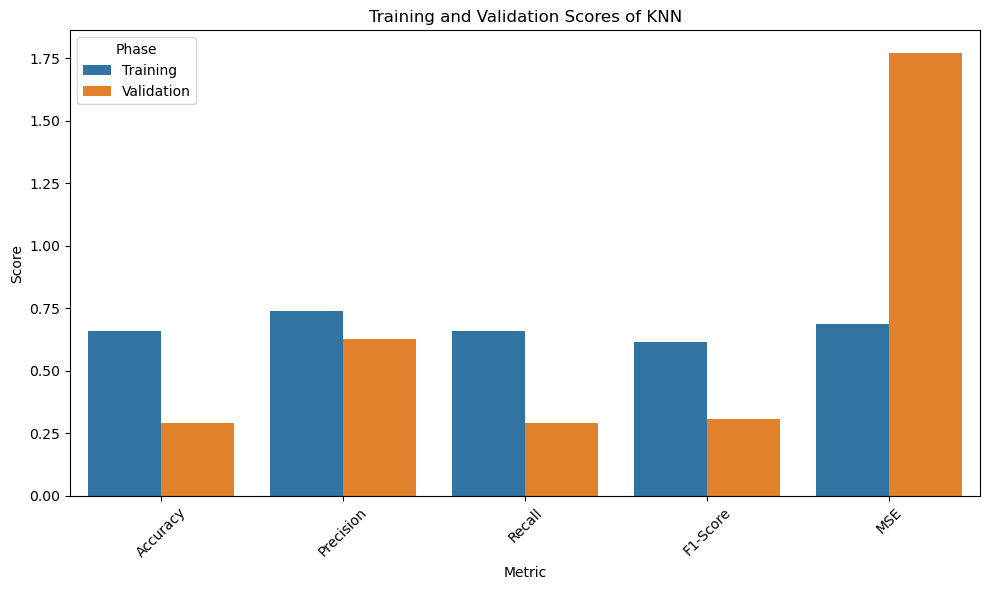

In [108]:
# Data for the KNN algorithms
algorithm = 'KNN'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'MSE']
train_scores = [0.66,0.739,0.66,0.615,0.687]
validation_scores = [0.291,0.629,0.291,0.307,1.773]

# Prepare the data for the plot
data = []
for j, metric in enumerate(metrics):
    data.append([metric, 'Training', train_scores[j]])
    data.append([metric, 'Validation', validation_scores[j]])

df = pd.DataFrame(data, columns=['Metric', 'Phase', 'Score'])

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Metric', y='Score', hue='Phase', errorbar=None)
plt.title(f'Training and Validation Scores of {algorithm}')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Phase')
plt.tight_layout()
plt.show()



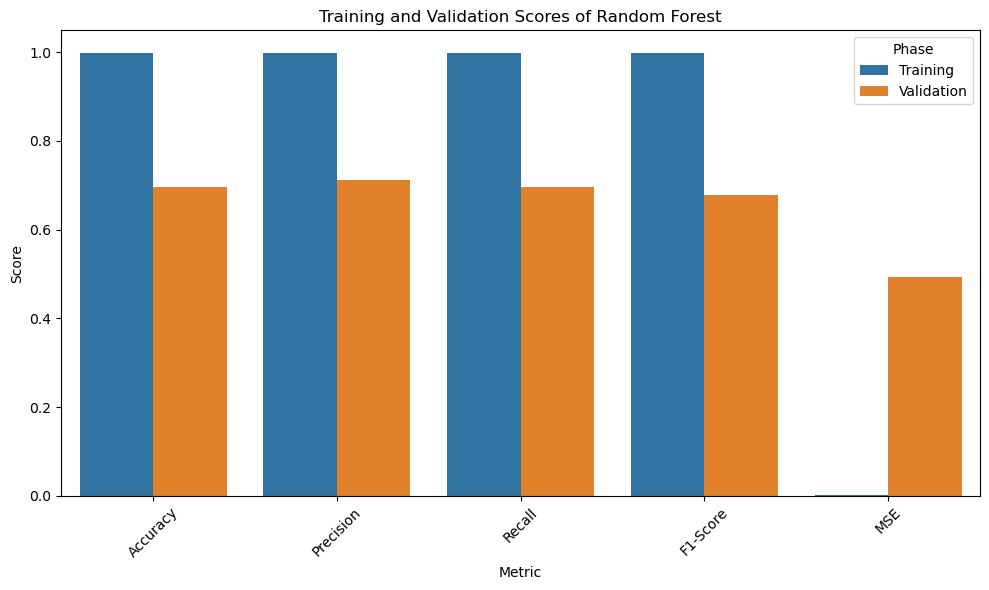

In [109]:
# Data for the algorithms
algorithm = 'Random Forest'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'MSE']
train_scores = [0.999, 0.999, 0.999, 0.999, 0.002]
validation_scores = [0.696,  0.711,  0.696, 0.679, 0.494]

# Prepare the data for the plot
data = []
for j, metric in enumerate(metrics):
    data.append([metric, 'Training', train_scores[j]])
    data.append([metric, 'Validation', validation_scores[j]])

df = pd.DataFrame(data, columns=['Metric', 'Phase', 'Score'])

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Metric', y='Score', hue='Phase',  errorbar=None)
plt.title(f'Training and Validation Scores of {algorithm}')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Phase')
plt.tight_layout()
plt.show()


In [115]:

import pickle

with open('./model.pickle', 'wb') as file:
    pickle.dump(svc, file)

In [ ]:
User input prediction

In [170]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [172]:
with open('./model.pickle', 'rb') as f:
    model = pickle.load(f)

In [174]:
with open('./stop words/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [176]:
vocab = pd.read_csv('./vocabulary.txt', header=None)
tokens = vocab[0].tolist()

In [178]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [180]:
def preprocessing(text):
    data = pd.DataFrame([text], columns=['posts'])
    data["posts"] = data["posts"].apply(lambda x: " ".join(x.lower() for x in x.split()))
    data["posts"] = data['posts'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))
    data["posts"] = data["posts"].apply(remove_punctuations)
    data["posts"] = data['posts'].str.replace('\d+', '', regex=True)
    data["posts"] = data["posts"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    data["posts"] = data["posts"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))
    return data["posts"]

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\KMN IT\AppData\Local\Temp\ipykernel_18504\3609352730.py:6: SyntaxWarning: invalid escape sequence '\d'
  data["posts"] = data['posts'].str.replace('\d+', '', regex=True)


In [182]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [222]:
def get_prediction(vectorized_text):
    prediction = model.predict(vectorized_text)
    if prediction == -2:
        return 'very negative'
    elif prediction == -1:
        return 'negative'
    elif prediction == 0:
        return 'natural'
    elif prediction == 1:
        return 'positve'
    else:
        return 'error'

In [224]:
txt ='52'
preprocessed_txt = preprocessing(txt)
vectorized_txt = vectorizer(preprocessed_txt, tokens)
prediction = get_prediction(vectorized_txt)
prediction

'positve'